In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:

df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
cdf.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


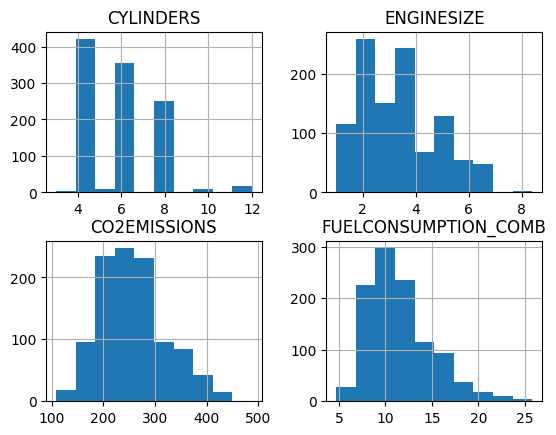

In [6]:
data1 = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']] 
data1.hist()
plt.show()

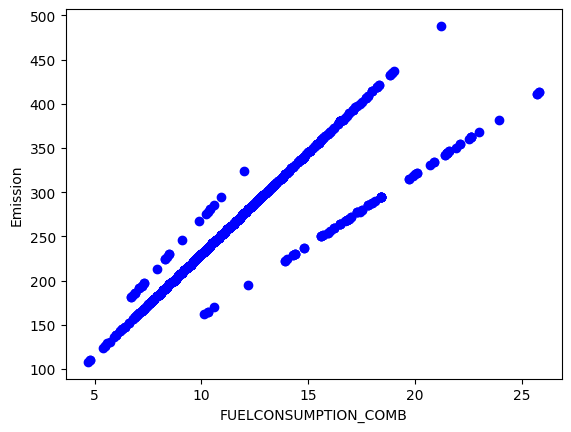

In [7]:

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue') 
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()


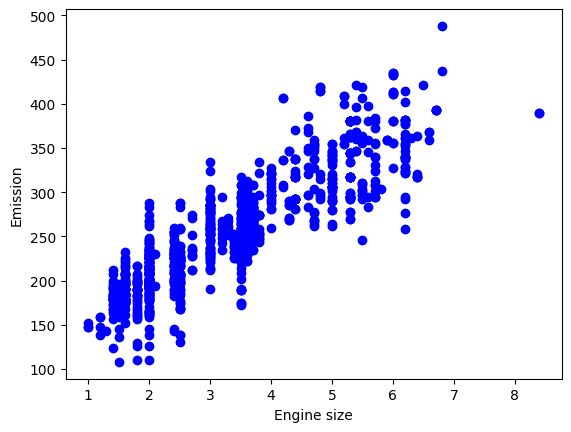

In [8]:

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()



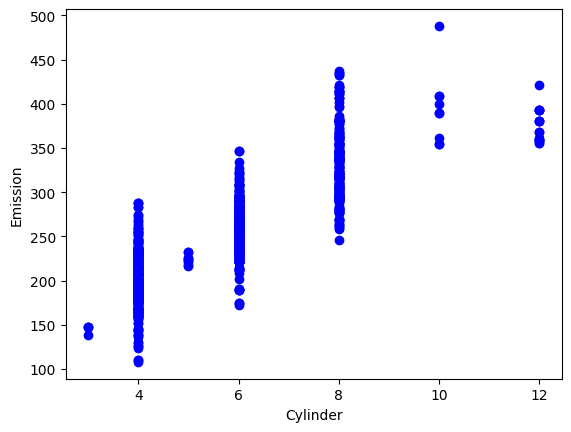

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()


In [10]:

msk = np.random.rand(len(df))<0.80
train = cdf[msk]
test = cdf[~msk]


Engine Size vs C02 Emission

In [43]:


from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.99054331]]
Intercept:  [125.70638804]


Text(0, 0.5, 'Emission')

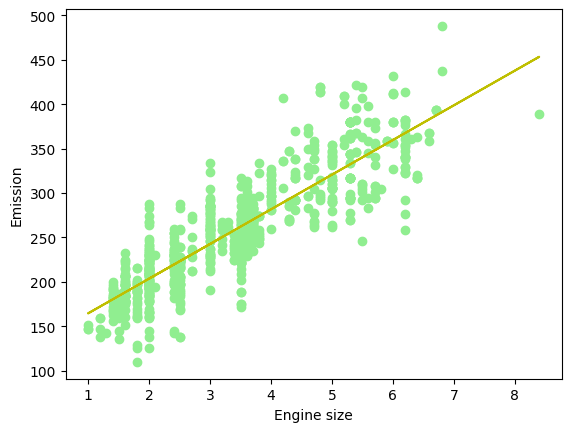

In [44]:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='lightgreen') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [47]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))



Mean absolute error: 23.75
Residual sum of squares (MSE): 972.60
R2-score: 0.68


Engine Size vs Fuel Compsumption

In [48]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['ENGINESIZE']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.32887674]]
Intercept:  [-0.45530554]


Text(0, 0.5, 'Enginer size')

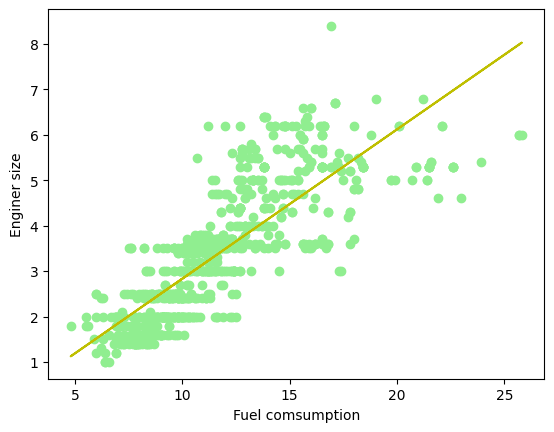

In [49]:

plt.scatter(train.FUELCONSUMPTION_COMB, train.ENGINESIZE, color='lightgreen') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("Fuel comsumption")
plt.ylabel("Enginer size")


In [50]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['ENGINESIZE']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))

Mean absolute error: 0.60
Residual sum of squares (MSE): 0.61
R2-score: 0.50


Fuel Comsumption Vs CO2 Emission


In [51]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[15.984809]]
Intercept:  [71.09590592]


Text(0, 0.5, 'Enginer size')

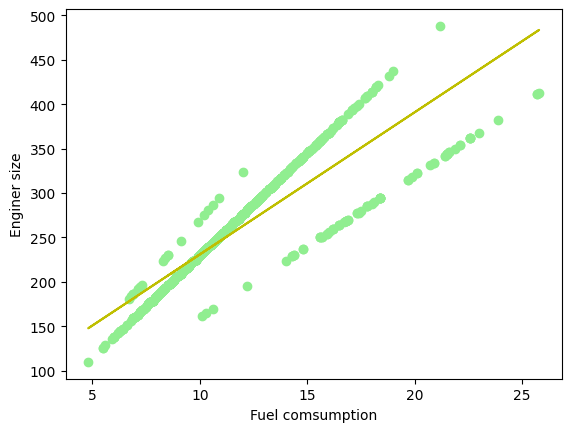

In [52]:

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='lightgreen') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("Fuel comsumption")
plt.ylabel("Enginer size")


In [53]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))

Mean absolute error: 19.57
Residual sum of squares (MSE): 750.98
R2-score: 0.74


In [34]:
import pandas as pd
import numpy as np
XX =[[100,1,1,1],[200,2,2,1],[300,2,2,1]]
X = np.array(XX)
YY =[5,10,9]
Y = np.array(YY)
X[:,0]
X


array([[100,   1,   1,   1],
       [200,   2,   2,   1],
       [300,   2,   2,   1]])

In [35]:
theta0 =1
theta1 =1
yhat1 =(theta0 +(theta1*X[0][0]))

yhat2 =(theta0 +(theta1*X[1][0]))

yhat3 =(theta0 +(theta1*X[2][0]))

yhat =[yhat1, yhat2, yhat3]

yhat



[101, 201, 301]

In [36]:


Error1 = yhat1 - Y[0]

Error2 = yhat2 - Y[1]

Error3 = yhat3 - Y[2]

Error3

292

In [37]:

Error =(Error1**2)+(Error2**2)+(Error3**2)
Errormean =1/3* Error

Errormean


43653.666666666664

Yhat:  [100, 200, 300]


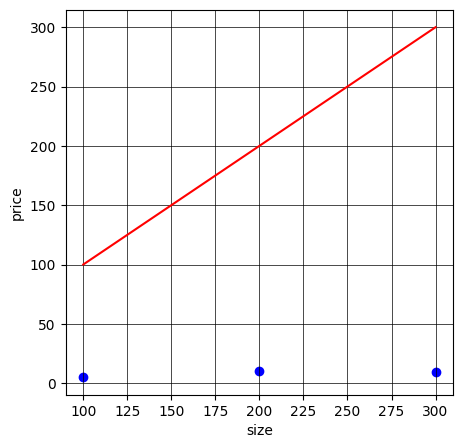

In [38]:


theta0 =0
theta1 =1
yhat1 =(theta0 +(theta1*X[0][0]))

yhat2 =(theta0 +(theta1*X[1][0]))

yhat3 =(theta0 +(theta1*X[2][0]))
yhat =[yhat1, yhat2, yhat3]
#yhat = [20, 40, 60]
plt.figure(figsize=(5,5))
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.scatter(X[:,0], Y, color='blue')
plt.plot(X[:,0], yhat,'-r')
plt.xlabel("size")
plt.ylabel("price")
print ('Yhat: ', yhat)

Yhat:  [1, 1, 1]


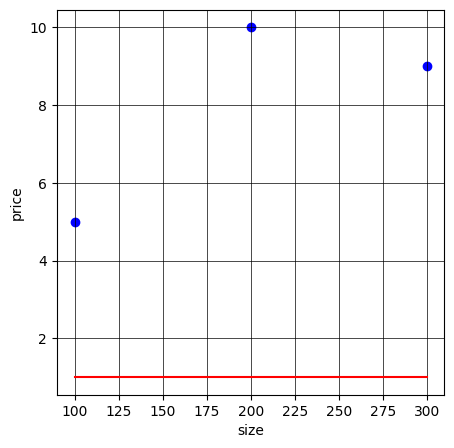

In [39]:
theta0 =1
theta1 =0
yhat1 =(theta0 +(theta1*X[0][0]))

yhat2 =(theta0 +(theta1*X[1][0]))

yhat3 =(theta0 +(theta1*X[2][0]))
yhat =[yhat1, yhat2, yhat3]

plt.figure(figsize=(5,5))
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.scatter(X[:,0], Y, color='blue')
plt.plot(X[:,0], yhat,'-r')
plt.xlabel("size")
plt.ylabel("price")
print ('Yhat: ', yhat)


Yhat:  [10.5, 20.5, 30.5]


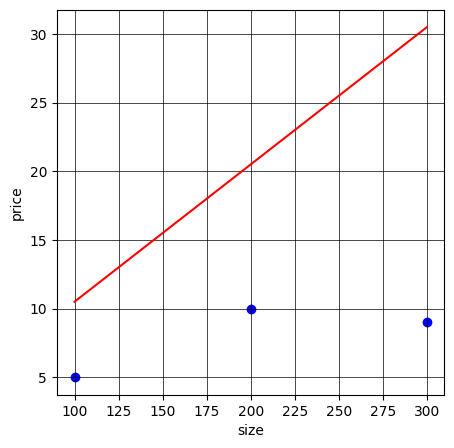

In [40]:

theta0 =0.5
theta1 =0.1
yhat1 =(theta0 +(theta1*X[0][0]))

yhat2 =(theta0 +(theta1*X[1][0]))

yhat3 =(theta0 +(theta1*X[2][0]))
yhat =[yhat1, yhat2, yhat3]

plt.figure(figsize=(5,5))
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.scatter(X[:,0], Y, color='blue')
plt.plot(X[:,0], yhat,'-r')
plt.xlabel("size")
plt.ylabel("price")
print ('Yhat: ', yhat)


Text(0, 0.5, 'price')

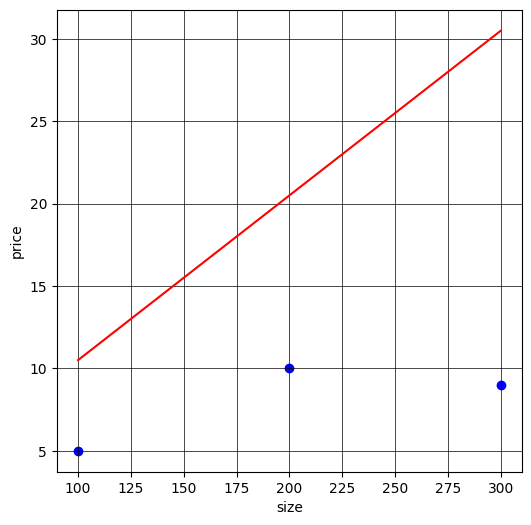

In [41]:

plt.figure(figsize=(6,6))
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.scatter(X[:,0], Y, color='blue')
plt.plot(X[:,0], yhat,'-r')
plt.xlabel("size")
plt.ylabel("price")

